#  Análisis Gustos Iniciales

---

In [1]:
# =====================================
# Importación de librerías
# =====================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# =====================================
# Importación de datos
# =====================================

df_peliculas = pd.read_csv("../Parte 1/Puntuaciones/DatosPeliculasSeries.csv")
df_misdatos_iniciales = pd.read_csv("Puntuaciones/MiPuntuacion_inicial.csv")
df_misdatos_completos = pd.read_csv("Puntuaciones/MiPuntuacion_completa.csv")

In [3]:
# =====================================
# Análisis de la base de datos inicial
# =====================================

df_misdatos_iniciales

,Fecha,Titulo_ES,Titulo_IN,Año,Lugar,Idioma_Vis,Mi Nota
0,2025-01-01,Cómo entrenar a tu dragón,How to Train Your Dragon,2010,PRIME VIDEO,SUB / ING,9.0
1,2025-01-01,La Escuela del Bien y del Mal,The School for Good and Evil,2022,NETFLIX,SUB / ING,8.5
2,2025-01-01,El proyecto Adam,The Adam Project,2022,NETFLIX,SUB / ING,8.0
3,2025-01-01,Spider-Man: Homecoming,Spider-Man: Homecoming,2017,NETFLIX,SUB / ING,7.5
4,2025-01-02,Spider-Man: Lejos de casa,Spider-Man: Far from Home,2019,NETFLIX,SUB / ING,7.5
...,...,...,...,...,...,...,...
330,2024-12-05,El señor de los anillos: La guerra de los Rohi...,The Lord of the Rings: The War of the Rohirrim,2024,CINESA,ESPAÑOL,8.5
331,2024-12-13,Kraven the Hunter,Kraven the Hunter,2024,CINESA,ESPAÑOL,8.0
332,2024-12-20,Mufasa: El rey león,Mufasa: The Lion King,2024,CINESA,ESPAÑOL,10.0
333,2024-12-26,Sonic 3: La película,Sonic the Hedgehog 3,2024,CINESA,ESPAÑOL,9.0


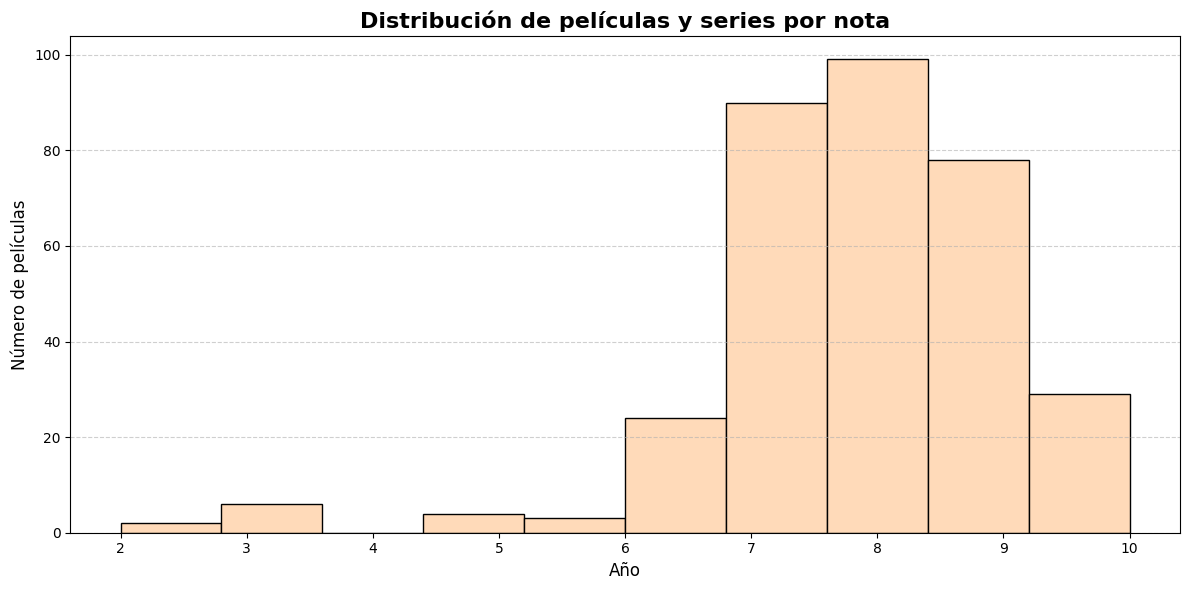

In [4]:
# =====================================
# Distribución de las notas
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df_misdatos_iniciales['Mi Nota'],
    edgecolor='black',
    color='peachpuff'
)

plt.title('Distribución de películas y series por nota', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

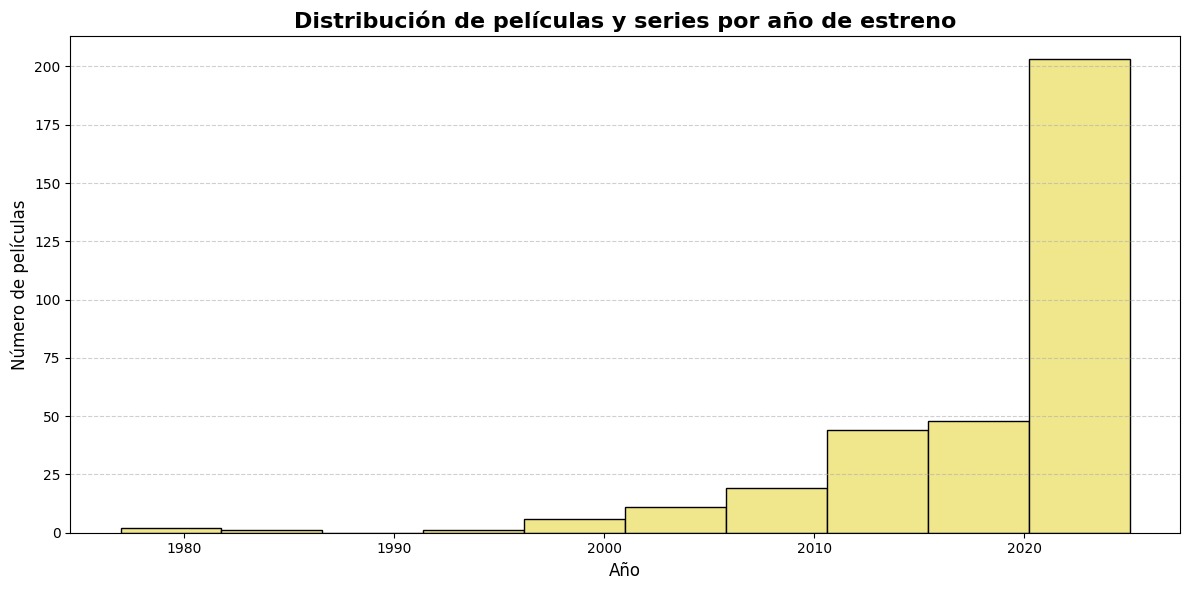

In [5]:
# =====================================
# Distribución de películas por año
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df_misdatos_iniciales['Año'],
    edgecolor='black',
    color='khaki'
)

plt.title('Distribución de películas y series por año de estreno', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

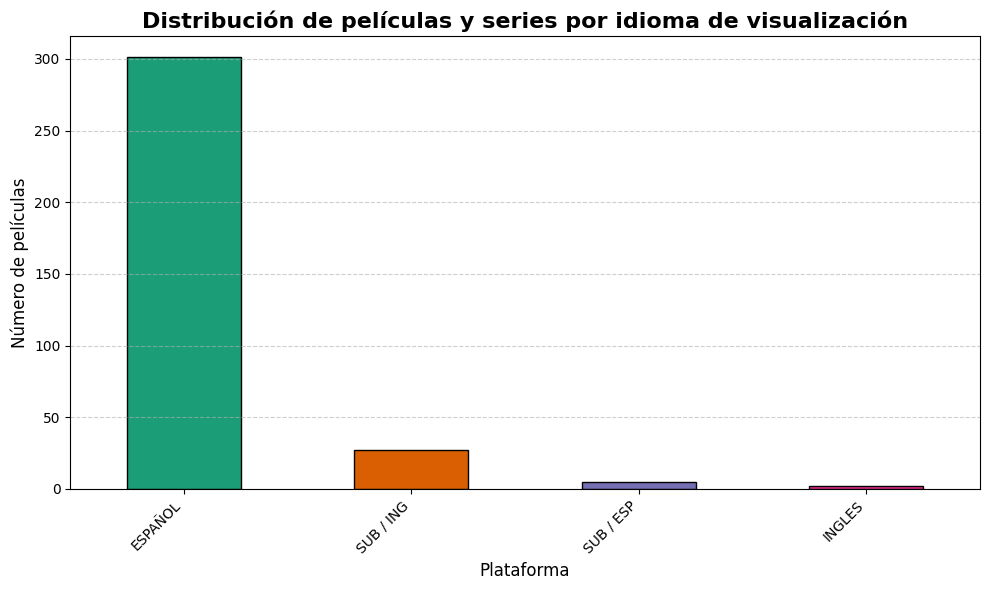

In [6]:
# =====================================
# Distribución de películas por idioma
# =====================================

plt.figure(figsize=(10, 6))

df_misdatos_iniciales['Idioma_Vis'].value_counts().plot(
    kind = 'bar',
    edgecolor = 'black',
    color = sns.palettes.mpl_palette('Dark2'),
)

plt.title('Distribución de películas y series por idioma de visualización', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

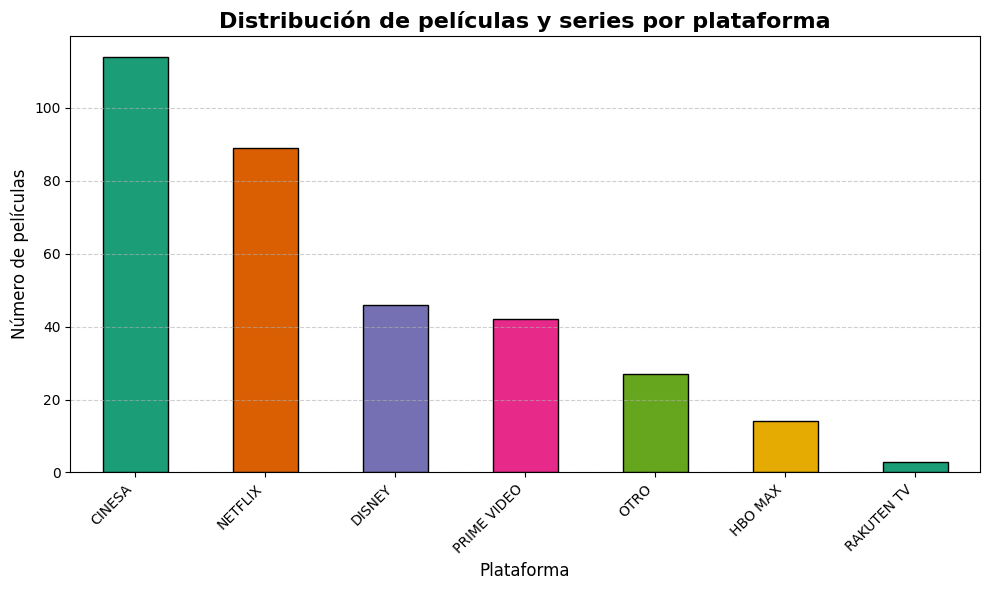

In [7]:
# =====================================
# Distribución de películas por plataforma
# =====================================

plt.figure(figsize=(10, 6))

df_misdatos_iniciales['Lugar'].value_counts().plot(
    kind = 'bar',
    edgecolor = 'black',
    color = sns.palettes.mpl_palette('Dark2'),
)

plt.title('Distribución de películas y series por plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [8]:
# =====================================
# Análisis de número de películas por nota
# =====================================

print("Titulos con nota inferior a 5: ",df_misdatos_iniciales[df_misdatos_iniciales["Mi Nota"] <= 5].count().iloc[0])

print("Titulos con nota igual o superior a 5: ",df_misdatos_iniciales[df_misdatos_iniciales["Mi Nota"] > 5].count().iloc[0])

Titulos con nota inferior a 5:  12
Titulos con nota igual o superior a 5:  323


#  Creación Base de Datos de Gustos Completos

---

In [13]:
# =====================================
# Análisis de número de películas por nota
# =====================================
df0_completo = df_misdatos_completos.merge(df_peliculas, on=['Titulo_ES', 'Año'], how='left')

print("Titulos con nota inferior a 5: ",df0_completo[df0_completo["Mi Nota"] <= 5].count().iloc[0])

print("Titulos con nota igual o superior a 5: ",df0_completo[df0_completo["Mi Nota"] > 5].count().iloc[0])

Titulos con nota inferior a 5:  493
Titulos con nota igual o superior a 5:  439


In [14]:
# =====================================
# Creación base de datos completa usuario 0
# =====================================

df0_completo["Fecha"] = pd.to_datetime(df0_completo['Fecha']).dt.date

df0_completo["Mi Nota"] = (
    df0_completo["Mi Nota"]
        .round()
        .clip(1, 10)
        .astype(int)
)
df0_completo["userId"] = 200949

df0_completo = df0_completo[['userId', 'tid', 'Fecha', 'Tipo', 'Titulo', 'Titulo_ES', 'Año', 'Mi Nota', 'Duracion', 'Generos', 'Puntuacion', 'Num_Votos', 'Actores', 'Directores', 'Idioma']].dropna().copy()

df0_completo

,userId,tid,Fecha,Tipo,Titulo,Titulo_ES,Año,Mi Nota,Duracion,Generos,Puntuacion,Num_Votos,Actores,Directores,Idioma
0,200949,tt0892769,2025-01-01,movie,How to Train Your Dragon,Cómo entrenar a tu dragón,2010,9,98,"Action,Adventure,Animation",8.1,874332,"['Jay Baruchel', 'Jonah Hill', 'Craig Ferguson...","['Dean DeBlois', 'Chris Sanders']","['fa', 'hi', 'bg', 'he', 'nl', 'cmn', 'ru', 'y..."
1,200949,tt2935622,2025-01-01,movie,The School for Good and Evil,La Escuela del Bien y del Mal,2022,8,147,"Action,Comedy,Drama",5.9,41024,"['Patti LuPone', 'Sofia Wylie', 'Kit Young', '...",['Paul Feig'],"['hi', 'yue', 'ja', 'tr', 'fr', nan, 'es', 'en']"
2,200949,tt2463208,2025-01-01,movie,The Adam Project,El proyecto Adam,2022,8,106,"Action,Adventure,Comedy",6.7,252667,"['Catherine Keener', 'Ryan Reynolds', 'Kasra W...",['Shawn Levy'],"['hi', 'yue', 'ja', 'tr', 'fr', nan, 'es', 'en']"
3,200949,tt2250912,2025-01-01,movie,Spider-Man: Homecoming,Spider-Man: Homecoming,2017,8,133,"Action,Adventure,Sci-Fi",7.4,779566,"['Michael Keaton', 'Laura Harrier', 'Jon Favre...",['Jon Watts'],"['hi', 'bg', 'he', 'cmn', 'ru', 'ja', 'tr', 'f..."
4,200949,tt6320628,2025-01-02,movie,Spider-Man: Far from Home,Spider-Man: Lejos de casa,2019,8,129,"Action,Adventure,Comedy",7.3,620280,"['Remy Hii', 'Jon Favreau', 'Tom Holland', 'An...",['Jon Watts'],"['hi', 'bg', 'he', 'cmn', 'ta', 'es', 'ru', 'y..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,200949,tt13465592,2025-12-29,movie,Deadly Illusions,Smertelniye illyuzii,2020,6,108,Thriller,5.8,279,"['Aleksandr Galibin', 'Sam Treskunov', 'Andrey...",['Oleg Asadulin'],"['ja', nan, 'en']"
928,200949,tt12032938,2025-12-30,movie,Muddy,Muddy,2021,6,137,"Action,Thriller",6.1,4030,"['Yuvan Krishna', 'Manoj Guinness', 'Shobha Mo...",['Pragabhal'],"['tr', 'hi', nan, 'en']"
929,200949,tt0094756,2025-12-31,movie,Blackout,Imposible recordar,1988,1,87,"Drama,Thriller",5.6,123,"[""Gail O'Grady"", 'Tamara Champlin', 'Joanna Mi...",['Doug Adams'],[nan]
930,200949,tt3769594,2026-01-01,movie,Jack's Apocalypse,Jack's Apocalypse,2015,4,80,"Fantasy,Sci-Fi,Thriller",6.0,779,"['Dave Maldonado', 'Grover Coulson', 'Ashlea R...",['Will James Moore'],[nan]


In [11]:
# =====================================
# Creación base de datos reducida usuario 0
# =====================================

df0 = df0_completo[["userId", "Mi Nota", "tid", "Fecha"]].copy()

df0 = df0.sort_values(by=["userId", "tid", "Fecha"], ascending=[True, True, False]).copy()

df0 = df0.drop_duplicates(subset=["userId", "tid"], keep="first").drop(columns=["Fecha"])

df0

,userId,Mi Nota,tid
602,200949,5,tt0076995
409,200949,5,tt0078833
784,200949,1,tt0079619
488,200949,5,tt0080436
377,200949,2,tt0080554
...,...,...,...
140,200949,8,tt9603212
143,200949,8,tt9619824
459,200949,6,tt9760852
514,200949,3,tt9764362


In [12]:
# =====================================
# Guardado de las bases de datos
# =====================================

df0_completo.to_csv("Puntuaciones/200949_completo.csv", index=False)
df0.to_csv("Puntuaciones/200949.csv", index=False)